In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#import crash data. Set low_memory as false because of mixed data column
rawCrash = pd.read_csv('/Users/samuelclark/Documents/UMBC Data Science /Introduction to Data Science/Final Project/Data/Crashes_in_DC.csv'
                      , low_memory=False)

In [52]:
#viewing data. 
pd.set_option('display.max_columns', None)
rawCrash.head()

,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,FROMDATE,TODATE,MARID,ADDRESS,LATITUDE,LONGITUDE,XCOORD,YCOORD,WARD,EVENTID,MAR_ADDRESS,MAR_SCORE,MAJORINJURIES_BICYCLIST,MINORINJURIES_BICYCLIST,UNKNOWNINJURIES_BICYCLIST,FATAL_BICYCLIST,MAJORINJURIES_DRIVER,MINORINJURIES_DRIVER,UNKNOWNINJURIES_DRIVER,FATAL_DRIVER,MAJORINJURIES_PEDESTRIAN,MINORINJURIES_PEDESTRIAN,UNKNOWNINJURIES_PEDESTRIAN,FATAL_PEDESTRIAN,TOTAL_VEHICLES,TOTAL_BICYCLES,TOTAL_PEDESTRIANS,PEDESTRIANSIMPAIRED,BICYCLISTSIMPAIRED,DRIVERSIMPAIRED,TOTAL_TAXIS,TOTAL_GOVERNMENT,SPEEDING_INVOLVED,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCATIONERROR,LASTUPDATEDATE,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY,BLOCKKEY,SUBBLOCKKEY,FATALPASSENGER,MAJORINJURIESPASSENGER,MINORINJURIESPASSENGER,UNKNOWNINJURIESPASSENGER
0,-76.927085,38.894377,192957077,27991659,19050656,2019/03/26 13:33:18+00,12029642,534.43,18.93,615.0,14930.0,2019/03/26 04:00:00+00,1970/01/01 00:00:00+00,44982,274 DIVISION AVENUE NE,38.894518,-76.927255,406310.624,136299.237,Ward 7,{354DD7E1-A9A2-4240-9185-A3F4906C2228},274 DIVISION AVENUE NE,200.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,12024242,CLOUD PL NE,13.10,South,NaN,1970/01/01 00:00:00+00,38.894415,-76.927293,406307.42,136287.79,6fd11860be76867493da2ec98468c769,6fd11860be76867493da2ec98468c769,0,0,0,0
1,-77.036396,38.960467,192957078,27715972,18102625,2018/06/24 03:49:07+00,11001602,6713.71,3.26,8029.0,8915.0,2018/06/23 04:00:00+00,1970/01/01 00:00:00+00,256118,5800 16TH STREET NW,38.960164,-77.036781,396812.190,143584.581,Ward 4,{17DE2546-EE88-4444-AFF1-950425DC1621},5800 16TH STREET NW,200.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,11064872,NICHOLSON ST NW,32.57,North,NaN,1970/01/01 00:00:00+00,38.960459,-77.036431,396812.23,143604.39,3daa93cf853638a89321f921106cf299,3daa93cf853638a89321f921106cf299,0,0,0,0
2,-76.958738,38.896709,192957079,27715973,18102602,2018/06/24 04:05:53+00,12015342,2289.58,5.17,1272.0,12308.0,2018/06/23 04:00:00+00,1970/01/01 00:00:00+00,301049,3400 BENNING ROAD NE,38.896477,-76.951464,404210.372,136515.268,Ward 7,{1F2C12F2-A876-4219-B39E-2C8A3FAB41D7},3400 BENNING ROAD NE,200.0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,1,0,0,1,12003402,34TH ST NE,109.14,West,NaN,1970/01/01 00:00:00+00,38.896747,-76.958724,404151.99,136570.94,51e1a4cc02033e1dd539bd6fdc0aaa57,bb461ebff117b1dad0d1e7163a274fdb,0,0,1,0
3,-76.979008,38.867878,192957080,27425857,17155768,2017/09/08 23:11:43+00,13001802,1293.11,20.65,-9.0,26611.0,2017/09/07 04:00:00+00,1970/01/01 00:00:00+00,150141,1809 18TH STREET SE,38.867870,-76.979443,401783.954,133338.812,Ward 7,{7F9978AF-6709-469B-BB57-8669AE4A4EEB},1809 18TH STREET SE,200.0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,13077672,S ST SE,40.14,South,NaN,1970/01/01 00:00:00+00,38.867870,-76.979244,401801.29,133338.84,c5bd0a92fc12a1cf33c6a856f3384d8c,c5bd0a92fc12a1cf33c6a856f3384d8c,0,0,0,0
4,-77.072910,38.922552,192957081,27978124,19042134,2019/03/13 03:25:35+00,11094052,2422.38,0.05,10392.0,8469.0,2019/03/12 04:00:00+00,1970/01/01 00:00:00+00,300366,WISCONSIN AVENUE NW & CALVERT STREET NW,38.922544,-77.072907,393677.740,139410.340,Ward 3,{3EBFB626-2BDD-4712-BCC4-824AC1F4D71D},2501 WISCONSIN AVENUE NW,200.0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,11020022,CALVERT ST NW,0.04,North,NaN,1970/01/01 00:00:00+00,38.922544,-77.072907,393677.74,139410.34,a2cbedf18ea68ab721d3d3c75771b0c0,a2cbedf18ea68ab721d3d3c75771b0c0,0,0,0,0


In [53]:
#number of rows and columns
rows = len(rawCrash.axes[0])
cols = len(rawCrash.axes[1])
print("Number of rows: ", rows)
print("Number of columns: ", cols)

#no dupes in rawCrash
rduplicate = rawCrash.duplicated()
print("number of dupes in data:",rduplicate.sum())

Number of rows:  245136
Number of columns:  60
number of dupes in data: 0


In [54]:
#droping the columns we won't likely use. Mosty location data. Kept EVENTID to keep rows unique 
variables = ['EVENTID','REPORTDATE','WARD','MAJORINJURIES_BICYCLIST', 
             'MINORINJURIES_BICYCLIST','UNKNOWNINJURIES_BICYCLIST', 'FATAL_BICYCLIST', 
             'MAJORINJURIES_DRIVER','MINORINJURIES_DRIVER', 'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER',
             'MAJORINJURIES_PEDESTRIAN', 'MINORINJURIES_PEDESTRIAN',
             'UNKNOWNINJURIES_PEDESTRIAN', 'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES',
             'TOTAL_BICYCLES', 'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED',
             'BICYCLISTSIMPAIRED', 'DRIVERSIMPAIRED', 'TOTAL_TAXIS',
             'TOTAL_GOVERNMENT', 'SPEEDING_INVOLVED']
crash = rawCrash.loc[:,variables]

#converting date variables to datetime data types
crash['REPORTDATE'] = pd.to_datetime(crash['REPORTDATE'])


In [55]:
#checking for null values. Very little and mostly in address and ward which is not too concerning, 
#dropped address from and to date
null = crash.isnull().sum()
print(null)

EVENTID                       0
REPORTDATE                    0
WARD                          2
MAJORINJURIES_BICYCLIST       0
MINORINJURIES_BICYCLIST       0
UNKNOWNINJURIES_BICYCLIST     0
FATAL_BICYCLIST               0
MAJORINJURIES_DRIVER          0
MINORINJURIES_DRIVER          0
UNKNOWNINJURIES_DRIVER        0
FATAL_DRIVER                  0
MAJORINJURIES_PEDESTRIAN      0
MINORINJURIES_PEDESTRIAN      0
UNKNOWNINJURIES_PEDESTRIAN    0
FATAL_PEDESTRIAN              0
TOTAL_VEHICLES                0
TOTAL_BICYCLES                0
TOTAL_PEDESTRIANS             0
PEDESTRIANSIMPAIRED           0
BICYCLISTSIMPAIRED            0
DRIVERSIMPAIRED               0
TOTAL_TAXIS                   0
TOTAL_GOVERNMENT              0
SPEEDING_INVOLVED             0
dtype: int64


In [56]:
#Limit crash data to 2018 to match the weather data range
#crash2 = crash.loc[(crash['REPORTDATE'].dt.year > 2014) & (crash['REPORTDATE'].dt.year < 2021)]
crash2 = crash.loc[(crash['REPORTDATE'].dt.year == 2018)]

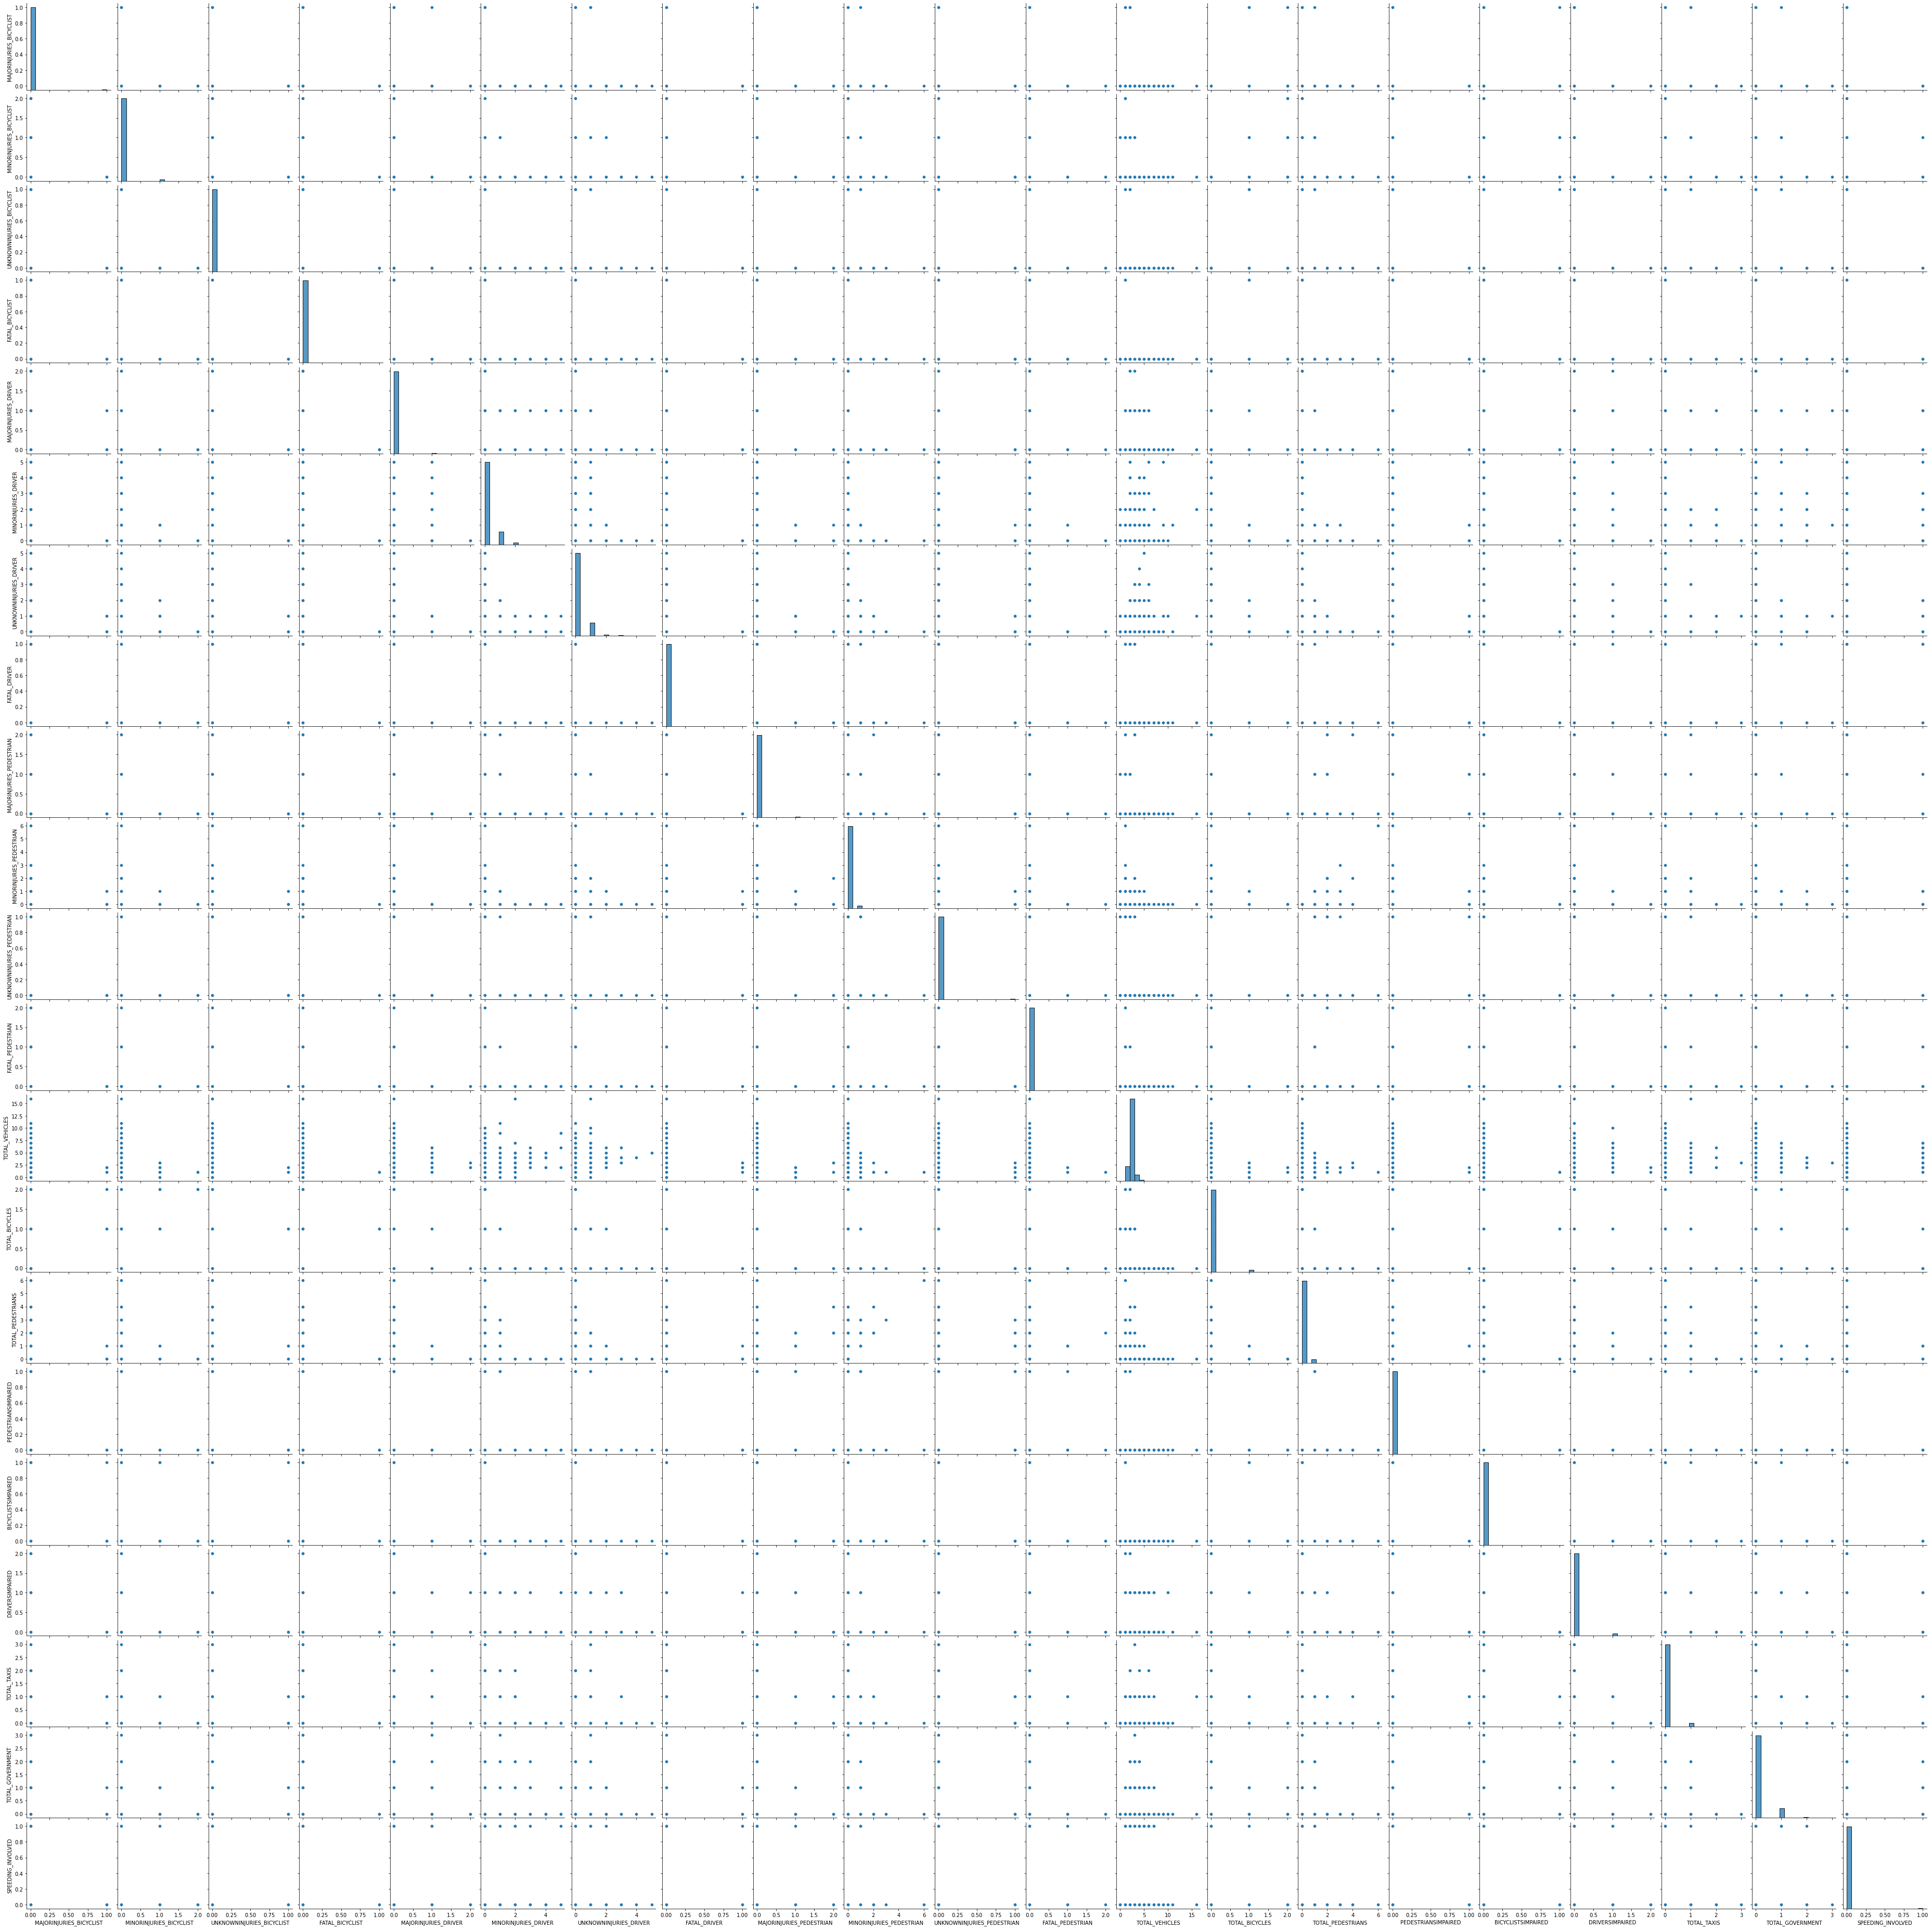

In [57]:
#too many pairplots
sns.pairplot(crash2)

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

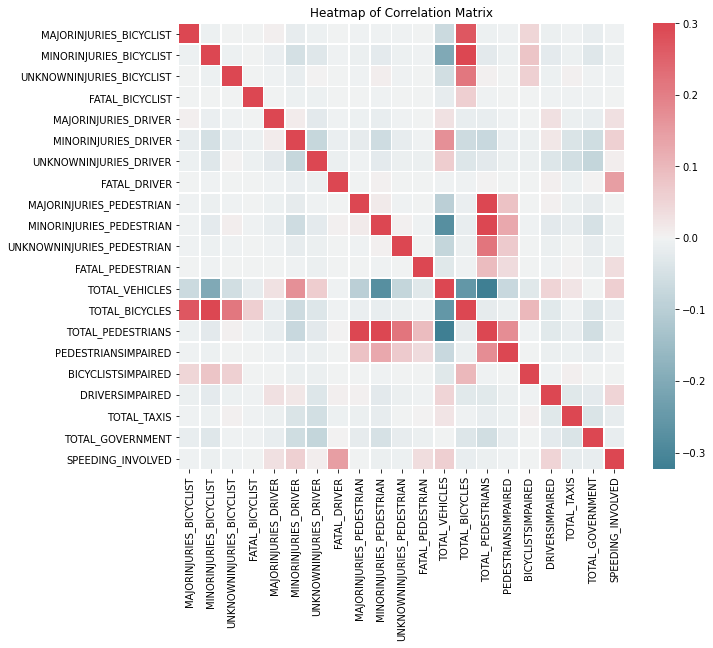

In [58]:
# Heatmap of features
corr = crash2.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [59]:
#checking shape to make sure correct number of columns were dropped
crash2.shape

(26549, 24)

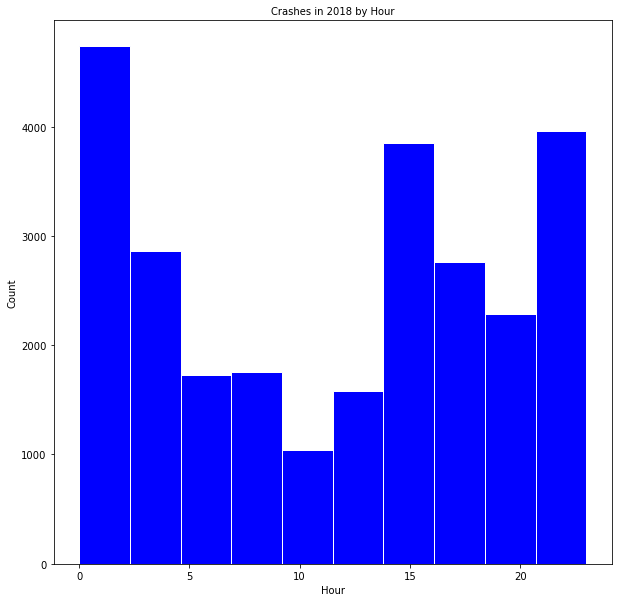

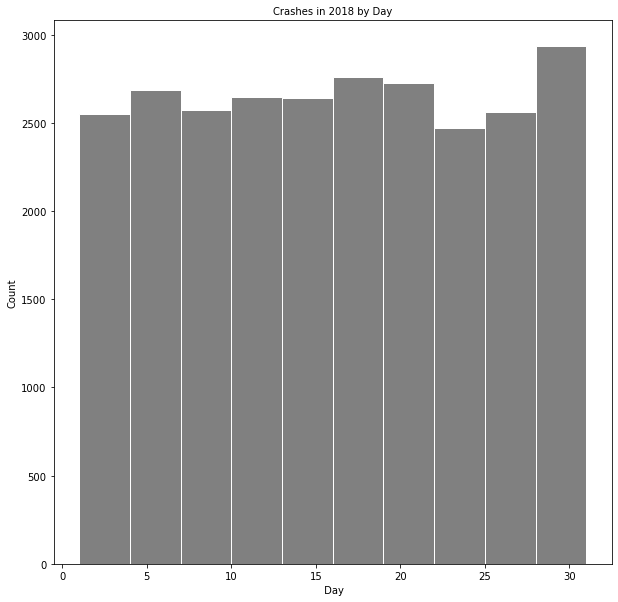

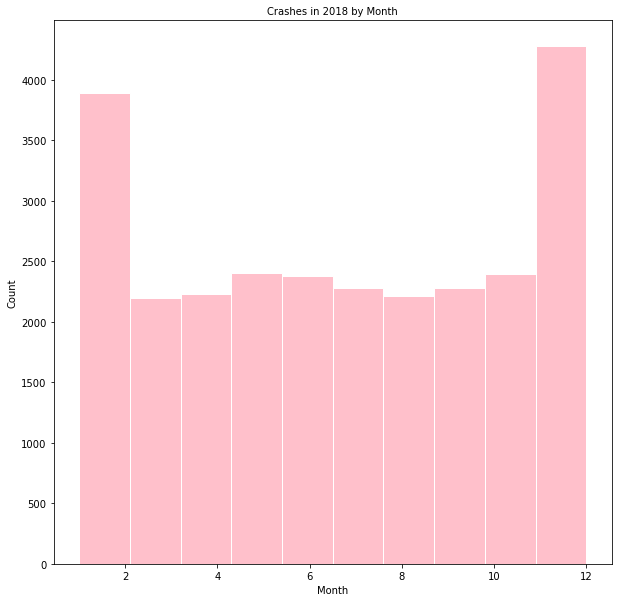

In [60]:
#Histogram of hours
fig = plt.figure(figsize=(10,10))
plt.hist(crash2['REPORTDATE'].dt.hour , color = 'Blue',edgecolor = 'white')
plt.title('Crashes in 2018 by Hour', color = 'Black', size = 10)
plt.xlabel('Hour', size= 10)
plt.tick_params(axis='x', labelsize=10)
plt.ylabel('Count')
plt.show()

#Histogram of Days
fig = plt.figure(figsize=(10,10))
plt.hist(crash2['REPORTDATE'].dt.day , color = 'Grey',edgecolor = 'white')
plt.title('Crashes in 2018 by Day', color = 'Black', size = 10)
plt.xlabel(' Day', size= 10)
plt.tick_params(axis='x', labelsize=10)
plt.ylabel('Count')
plt.show()

#Histogram of Months
fig = plt.figure(figsize=(10,10))
plt.hist(crash2['REPORTDATE'].dt.month , color = 'Pink',edgecolor = 'white')
plt.title('Crashes in 2018 by Month', color = 'Black', size = 10)
plt.xlabel('Month', size= 10)
plt.tick_params(axis='x', labelsize=10)
plt.ylabel('Count')
plt.show()

In [61]:
crash2.head()

,EVENTID,REPORTDATE,WARD,MAJORINJURIES_BICYCLIST,MINORINJURIES_BICYCLIST,UNKNOWNINJURIES_BICYCLIST,FATAL_BICYCLIST,MAJORINJURIES_DRIVER,MINORINJURIES_DRIVER,UNKNOWNINJURIES_DRIVER,FATAL_DRIVER,MAJORINJURIES_PEDESTRIAN,MINORINJURIES_PEDESTRIAN,UNKNOWNINJURIES_PEDESTRIAN,FATAL_PEDESTRIAN,TOTAL_VEHICLES,TOTAL_BICYCLES,TOTAL_PEDESTRIANS,PEDESTRIANSIMPAIRED,BICYCLISTSIMPAIRED,DRIVERSIMPAIRED,TOTAL_TAXIS,TOTAL_GOVERNMENT,SPEEDING_INVOLVED
1,{17DE2546-EE88-4444-AFF1-950425DC1621},2018-06-24 03:49:07+00:00,Ward 4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,{1F2C12F2-A876-4219-B39E-2C8A3FAB41D7},2018-06-24 04:05:53+00:00,Ward 7,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,1,0,0,1
14,{9F4BDFE5-66F0-446B-B3D6-2951A1D0B237},2018-11-01 23:52:03+00:00,Ward 7,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
16,{801FBB2D-336F-48C5-8E4E-F42AE7E79067},2018-11-01 23:48:30+00:00,Ward 7,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
17,{4B4C0236-CBE2-4D75-B300-057BCEEBFF6A},2018-06-24 04:27:23+00:00,Ward 3,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0


In [62]:
crash2.to_csv('/Users/samuelclark/Documents/UMBC Data Science /Introduction to Data Science/Final Project/Data/Crashes_in_DC_cleaned.csv',
             index= False)